# StartUp Funds EDA 

Welcome to the Python portion of my master's final project. In this exercise, we'll conduct exploratory data analysis on startup acquisitions and funding rounds using the "funds.csv" and "funding_rounds.csv" datasets. 

With 11 sections to tackle, each carrying equal weight, our goal is to create an executable Python script accompanied by thorough documentation. Through this analysis, we aim to uncover insights into the global startup landscape, identifying commonalities and trends. Let's get started!


In [1]:
#Importing Pandas
import pandas as pd

### 1. Convert the files funds.csv and funding_rounds.csv into pandas dataframes.

In [2]:
funds_1 = pd.read_csv('funds.csv') 

funds_2 = pd.read_csv('funding_rounds.csv')

print(type(funds_1)) #validating type as dataframe 
print(type(funds_2)) #validating type as dataframe

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


### 2. Find a common element in both dataframes and merge them into one.

In [3]:
#Looking for common columns between DF in funds_1
print(funds_1)

        id  fund_id object_id                        name   funded_at  \
0        1        1     f:371                 Second Fund  2008-12-16   
1        4        4      f:17  Sequoia Israel Fourth Fund  2008-12-17   
2        5        5     f:951                  Tenth fund  2008-08-11   
3        6        6     f:192           New funds acquire         NaN   
4        7        7     f:519                  Third fund  2008-05-20   
...    ...      ...       ...                         ...         ...   
1559  1697     1697     f:101                      Fund V  2013-12-11   
1560  1698     1698    f:7331   JANVEST Technologies LP I  2013-03-19   
1561  1699     1699    f:7791                     Fund II  2013-12-11   
1562  1700     1700   f:15091                      Fund I  2013-12-11   
1563  1701     1701    f:5920        Rochester Angel Fund  2013-12-12   

      raised_amount raised_currency_code  \
0       300000000.0                  USD   
1       200750000.0                

In [4]:
#Looking for common columns between DF in funds_2
print(funds_2)

          id  funding_round_id object_id   funded_at funding_round_type  \
0          1                 1       c:4  2006-12-01           series-b   
1          2                 2       c:5  2004-09-01              angel   
2          3                 3       c:5  2005-05-01           series-a   
3          4                 4       c:5  2006-04-01           series-b   
4          5                 5    c:7299  2006-05-01           series-b   
...      ...               ...       ...         ...                ...   
52923  57948             57948  c:211890  2013-12-12           series-a   
52924  57949             57949  c:267427  2010-02-06            venture   
52925  57950             57950  c:261728  2010-02-06            venture   
52926  57951             57951  c:285864  2013-12-12           series-a   
52927  57952             57952  c:286215  2010-04-07            venture   

      funding_round_code  raised_amount_usd  raised_amount  \
0                      b          850

In [5]:
#Merging DFs
funds_inner = pd.concat([funds_1,funds_2],ignore_index=True,join='inner') 

#Este método es más eficiente dado que permite unir todos los valores que estén en común
print(funds_inner)

          id object_id   funded_at  raised_amount raised_currency_code  \
0          1     f:371  2008-12-16    300000000.0                  USD   
1          4      f:17  2008-12-17    200750000.0                  USD   
2          5     f:951  2008-08-11    650000000.0                  USD   
3          6     f:192         NaN    625000000.0                  USD   
4          7     f:519  2008-05-20    200000000.0                  USD   
...      ...       ...         ...            ...                  ...   
54487  57948  c:211890  2013-12-12      3000000.0                  USD   
54488  57949  c:267427  2010-02-06       570000.0                  USD   
54489  57950  c:261728  2010-02-06      2184100.0                  USD   
54490  57951  c:285864  2013-12-12       790783.0                  USD   
54491  57952  c:286215  2010-04-07       271250.0                  USD   

                                              source_url  \
0      http://www.pehub.com/26194/dfj-dragon-raisin

### 3. Remove the columns 'id', 'source_url', 'source_description', 'updated_at'.

In [6]:
funds_inner.drop(['id', 'source_url', 'source_description', 'updated_at'], axis=1, inplace=True)
print(funds_inner.head())

  object_id   funded_at  raised_amount raised_currency_code  \
0     f:371  2008-12-16    300000000.0                  USD   
1      f:17  2008-12-17    200750000.0                  USD   
2     f:951  2008-08-11    650000000.0                  USD   
3     f:192         NaN    625000000.0                  USD   
4     f:519  2008-05-20    200000000.0                  USD   

            created_at  
0  2008-12-17 03:07:16  
1  2008-12-18 22:04:42  
2  2008-12-31 09:47:51  
3  2009-01-01 18:13:44  
4  2009-01-03 09:51:58  


### 4. Display the number of null values in each column of the dataframe and the percentage they represent within each column.

In [7]:
print("Total de nulos por columna")
print(funds_inner.isnull().sum())
print("****************************")
print("% Nulos por columna")
print(funds_inner.isnull().sum()/len(funds_inner)*100)

Total de nulos por columna
object_id                  0
funded_at                363
raised_amount              0
raised_currency_code    3066
created_at                 0
dtype: int64
****************************
% Nulos por columna
object_id               0.000000
funded_at               0.666153
raised_amount           0.000000
raised_currency_code    5.626514
created_at              0.000000
dtype: float64


### 5. Modify all null values in 'raised_currency_dode' to 'USD'.

In [8]:
funds_inner["raised_currency_code"].fillna("USD", inplace=True)

C:\Users\josem\AppData\Local\Temp\ipykernel_29108\3571794567.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  funds_inner["raised_currency_code"].fillna("USD", inplace=True)


In [9]:
funds_inner.isnull().sum()

object_id                 0
funded_at               363
raised_amount             0
raised_currency_code      0
created_at                0
dtype: int64

### 6. Remove all remaining null values from the dataset.

In [10]:
#Drop Nulls
funds_inner.dropna(inplace=True)

In [11]:
funds_inner.isnull().sum()

object_id               0
funded_at               0
raised_amount           0
raised_currency_code    0
created_at              0
dtype: int64

### 7. Display the percentage of different values in 'raised_currency_dode'.

In [18]:
funds_inner['raised_currency_code'].value_counts(normalize=True)

raised_currency_code
USD    0.918805
EUR    0.047221
GBP    0.025328
CAD    0.005339
SEK    0.001496
JPY    0.001312
AUD    0.000443
NIS    0.000055
Name: proportion, dtype: float64

### 8. Create a subset excluding the 'USD' value and visualize it using a bar chart.

In [13]:
#Subset without USD
funds_inner_notUSD = funds_inner[funds_inner['raised_currency_code']!='USD']

print(funds_inner_notUSD)

      object_id   funded_at  raised_amount raised_currency_code  \
12       f:1363  2001-07-12     22500000.0                  GBP   
13       f:1363  2008-07-19     45300000.0                  GBP   
45         f:18  2009-03-02    350000000.0                  EUR   
50       f:1142  2000-01-01    112000000.0                  EUR   
51       f:1142  2008-01-01    113000000.0                  EUR   
...         ...         ...            ...                  ...   
54419  c:285244  2011-01-01      1615000.0                  EUR   
54421  c:285244  2009-01-01       350000.0                  EUR   
54434  c:286145  2013-12-12       100000.0                  GBP   
54441  c:286151  2013-12-12      1300000.0                  GBP   
54451   c:60389  2013-07-10            0.0                  EUR   

                created_at  
12     2009-01-13 15:42:43  
13     2009-01-13 15:42:43  
45     2009-03-17 20:44:22  
50     2009-05-02 05:28:47  
51     2009-05-02 05:29:25  
...                  

In [14]:
#Importing Seaborn
import seaborn as sns

<Axes: xlabel='raised_currency_code', ylabel='count'>

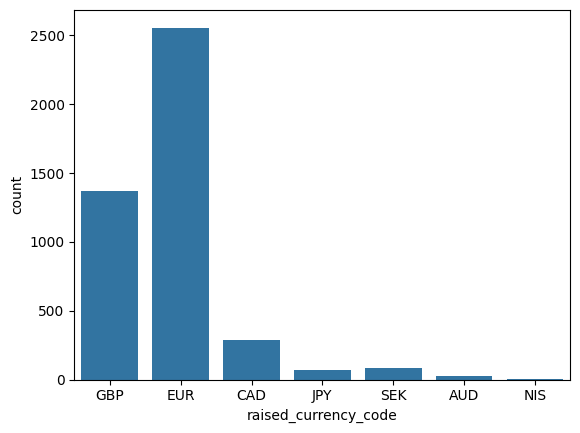

In [15]:
#Cat plot
sns.countplot(data=funds_inner_notUSD, x='raised_currency_code')

### 9. Create a new subset by filtering out all rows below 10M and visualize it using a histogram.

<Axes: xlabel='raised_amount', ylabel='Count'>

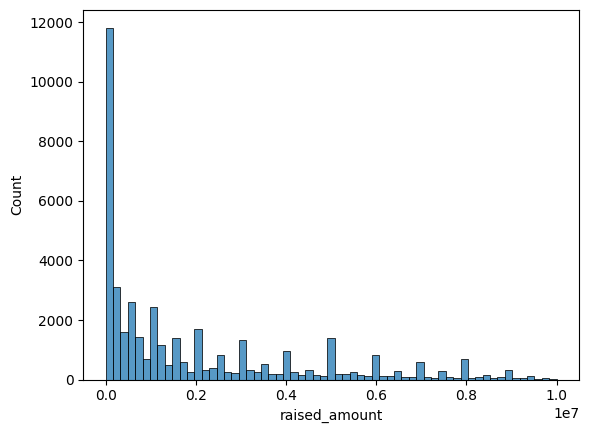

In [19]:
#Subset with less 10M
funds_less10M = funds_inner[funds_inner['raised_amount']<10000000]

sns.histplot(data=funds_less10M,x='raised_amount')

### 10. With the subset from the previous section, filter the dataset by the startup creation dates in 2000 using the **contains()** function.

In [23]:
#Creating a seriw with contains
start_ups_2000 = funds_less10M['funded_at'].str.contains('2000',regex=False)

print(type(start_ups_2000))

<class 'pandas.core.series.Series'>


In [31]:
#Filtering df with serie
funds_less10M = funds_less10M[start_ups_2000].sort_values(by='funded_at',ascending=True)

print(funds_less10M.head())

      object_id   funded_at  raised_amount raised_currency_code  \
32153    c:1705  2000-01-01            0.0                  USD   
10036   c:34402  2000-01-01      3000000.0                  USD   
6276    c:19586  2000-01-01      2000000.0                  USD   
21169   c:67397  2000-01-01      2000000.0                  USD   
4355     c:9009  2000-01-01      1350000.0                  EUR   

                created_at  
32153  2012-10-29 23:02:59  
10036  2009-10-22 22:24:21  
6276   2009-03-03 09:28:57  
21169  2011-01-29 01:10:37  
4355   2008-07-31 08:00:34  


C:\Users\josem\AppData\Local\Temp\ipykernel_29108\2215071953.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  funds_less10M = funds_less10M[start_ups_2000].sort_values(by='funded_at',ascending=True)


### 11. Visualize the amount obtained explained by the currency type on the dataset filtered by date.

In [41]:
import matplotlib.pyplot as plt

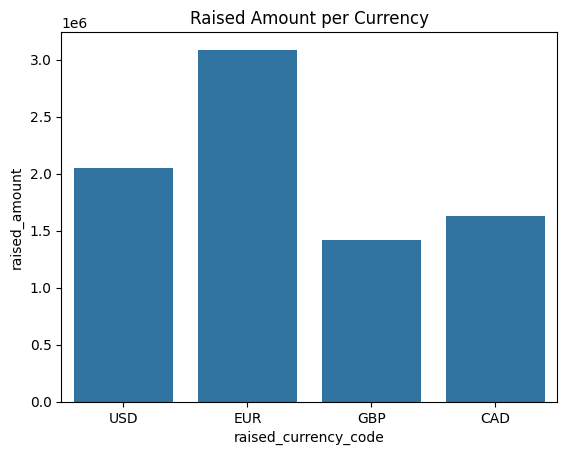

In [42]:
sns.barplot(data=funds_less10M, x='raised_currency_code',y='raised_amount',errorbar=None)
plt.title('Raised Amount per Currency')
plt.show()